### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import scipy.stats as stats

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})

### Function to find index of the nearest value

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Importing HDF5 file

In [3]:
import h5py

with h5py.File("channel.h5","r") as f:
    print(list(f.keys()))

['_contents', '_dataset', '_size', '_start', 'u00010']


In [4]:
with h5py.File("channel.h5","r") as f:
    temp = f["u00010"][()]

In [5]:
ux = temp[:,:,:,0]
ux = ux.T

### Importing y.dat file

In [6]:
yTemp = []

with open('y.dat') as f:
    for line in f:
        i = line.split()
        yTemp.append(i)
        
y = np.array(yTemp, dtype='float32')

### Finding index for $y^+ = 10$

In [7]:
uTau = 0.0499
nu = 5e-5
Re = 1000
deltaYplus = 10

dist = y[0] + deltaYplus*nu/uTau

ind = find_nearest(y, value=dist)

### Plotting and saving streamwise contour plots

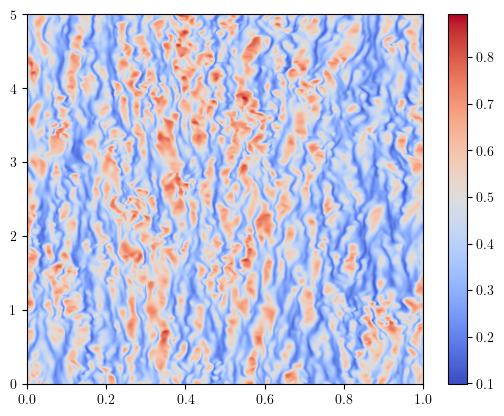

In [8]:
plt.imshow(ux[:,ind,:], extent=[0, 1, 0, 5], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='auto')
plt.colorbar();

plt.savefig('channelPlot/contour.pdf', bbox_inches='tight')

### Calculating and plotting mean velocity

In [9]:
deltaYplus = np.zeros(512)

deltaYplus = (y[:] - y[0]) * uTau / nu

u_mean = np.zeros(256)

for i in range(0,u_mean.shape[0]):
    u_mean[i] = (np.mean(ux[:,i,:]) + np.mean(ux[:,-(i+1),:]))/2

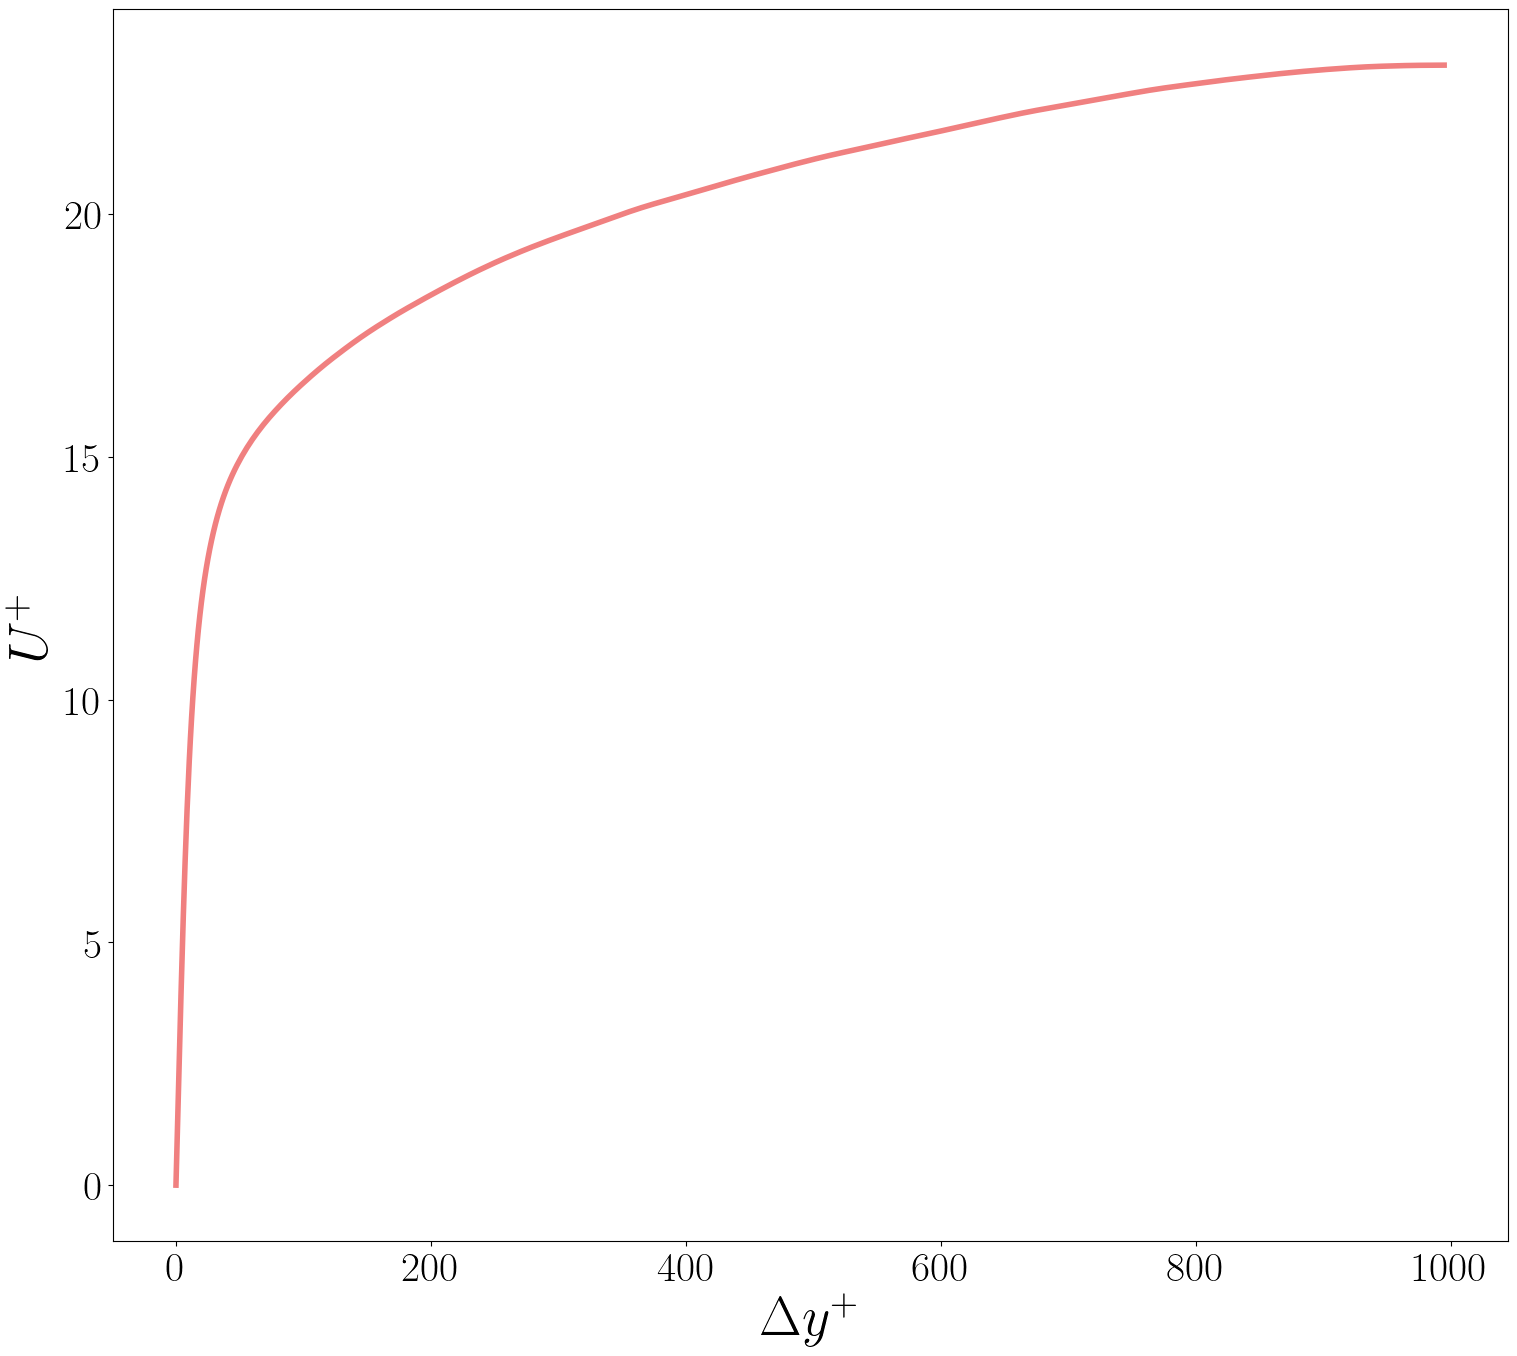

In [10]:
AxesLabel1, TickLabel1 = [40, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.plot(deltaYplus[0:256], u_mean/uTau, 'lightcoral', label=r'$u$', linewidth=4)
ax.set_xlabel(r'$\Delta y ^+$')
ax.set_ylabel(r'$U^+$')

plt.savefig('channelPlot/U_linear.pdf', bbox_inches='tight')

### Estimation of von Karman constant

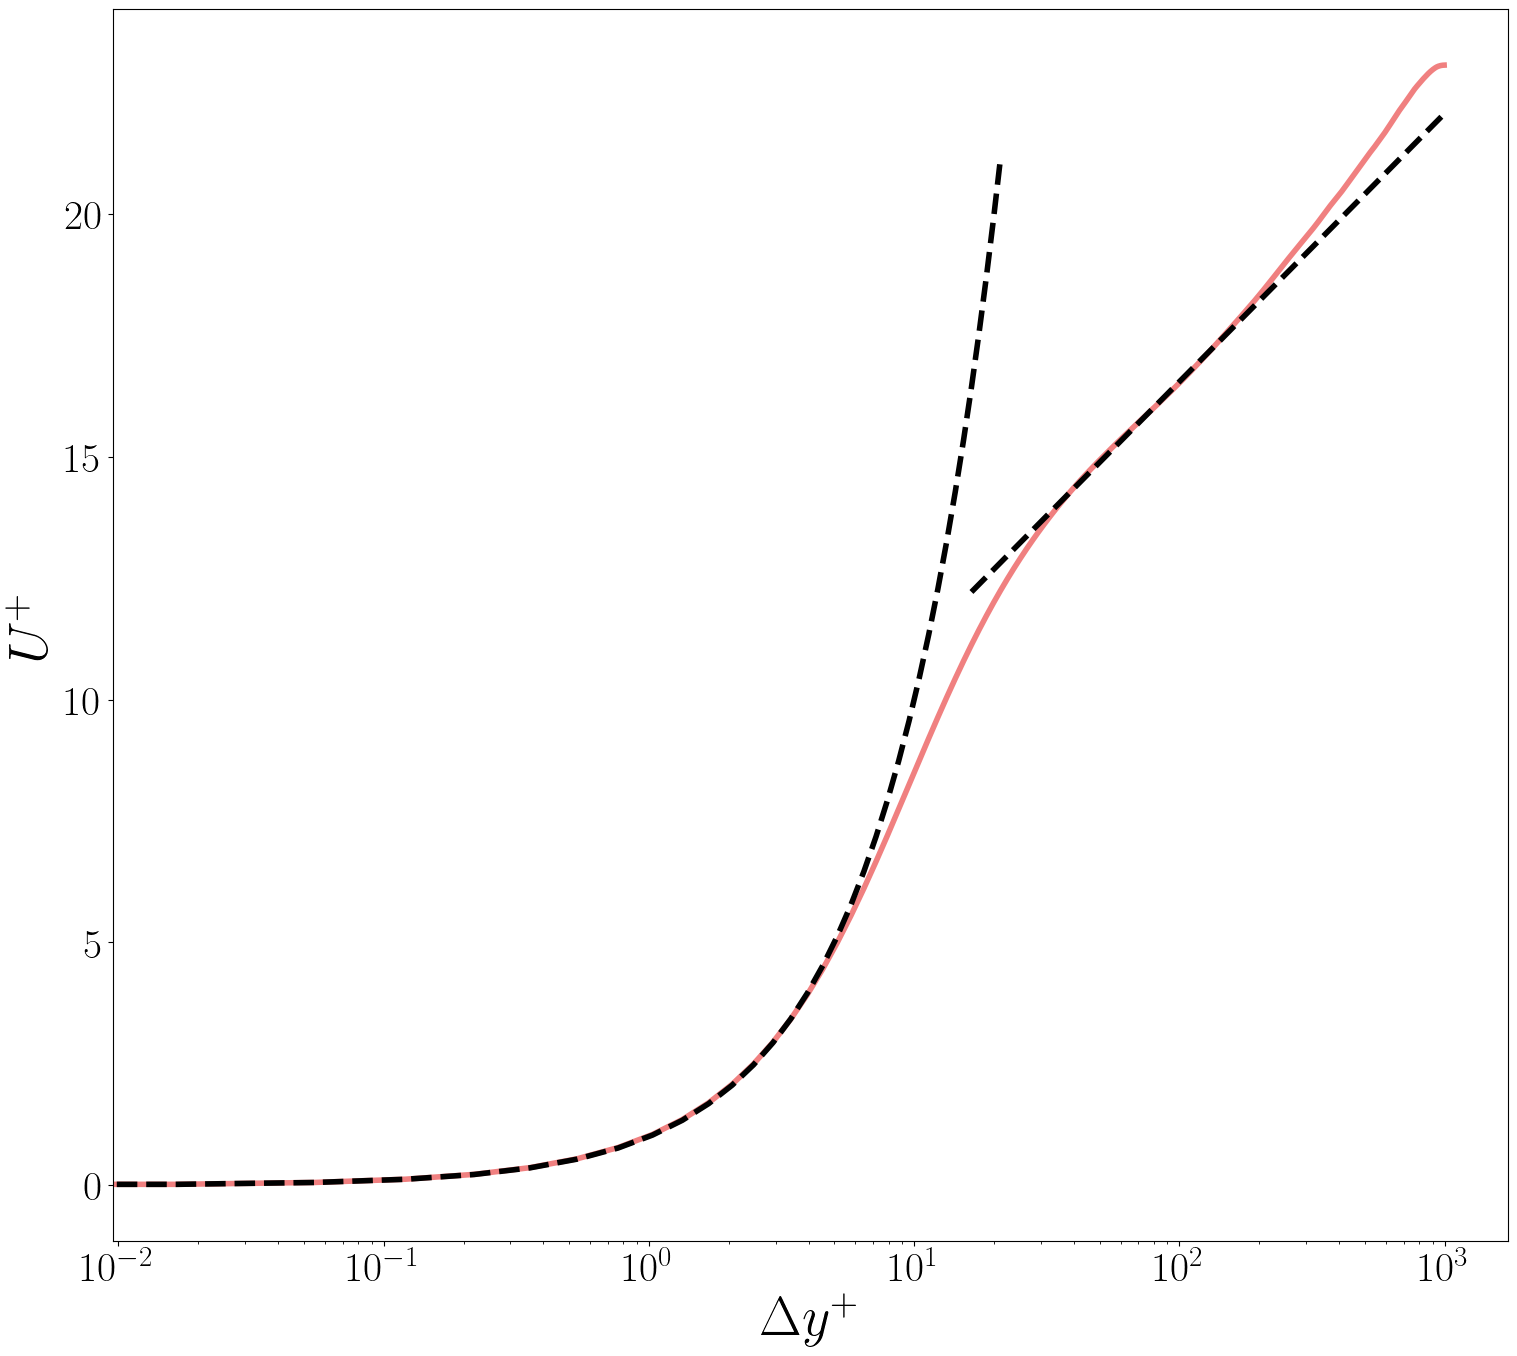

In [11]:
AxesLabel1, TickLabel1 = [40, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.semilogx(deltaYplus[0:256], u_mean/uTau, 'lightcoral', label=r'$u$', linewidth=4)
ax.semilogx(deltaYplus[0:35], deltaYplus[0:35], 'k--', label=r'$U^+ = \Delta y^+$', linewidth=4)
ax.semilogx(deltaYplus[30:256], 2.4*np.log(deltaYplus[30:256])+5.5, 'k--', label=r'$U^+ = 2.4 \log \Delta y^+ +5.5$', linewidth=4)

ax.set_xlabel(r'$\Delta y ^+$')
ax.set_ylabel(r'$U^+$')

plt.savefig('channelPlot/U_log.pdf', bbox_inches='tight')

### Comparing profile with Lee and Moser

In [12]:
y1Temp = []
yPlusTemp = []
UTemp = []

with open('Lee.dat') as f:
    for line in f:
        a,b,c,d,e,f = line.split()
        y1Temp.append(a)
        yPlusTemp.append(b)
        UTemp.append(c)
        
y1 = np.array(y1Temp, dtype='float32')
yPlus = np.array(yPlusTemp, dtype='float32')
U = np.array(UTemp, dtype='float32')

Text(0, 0.5, '$U^+$')

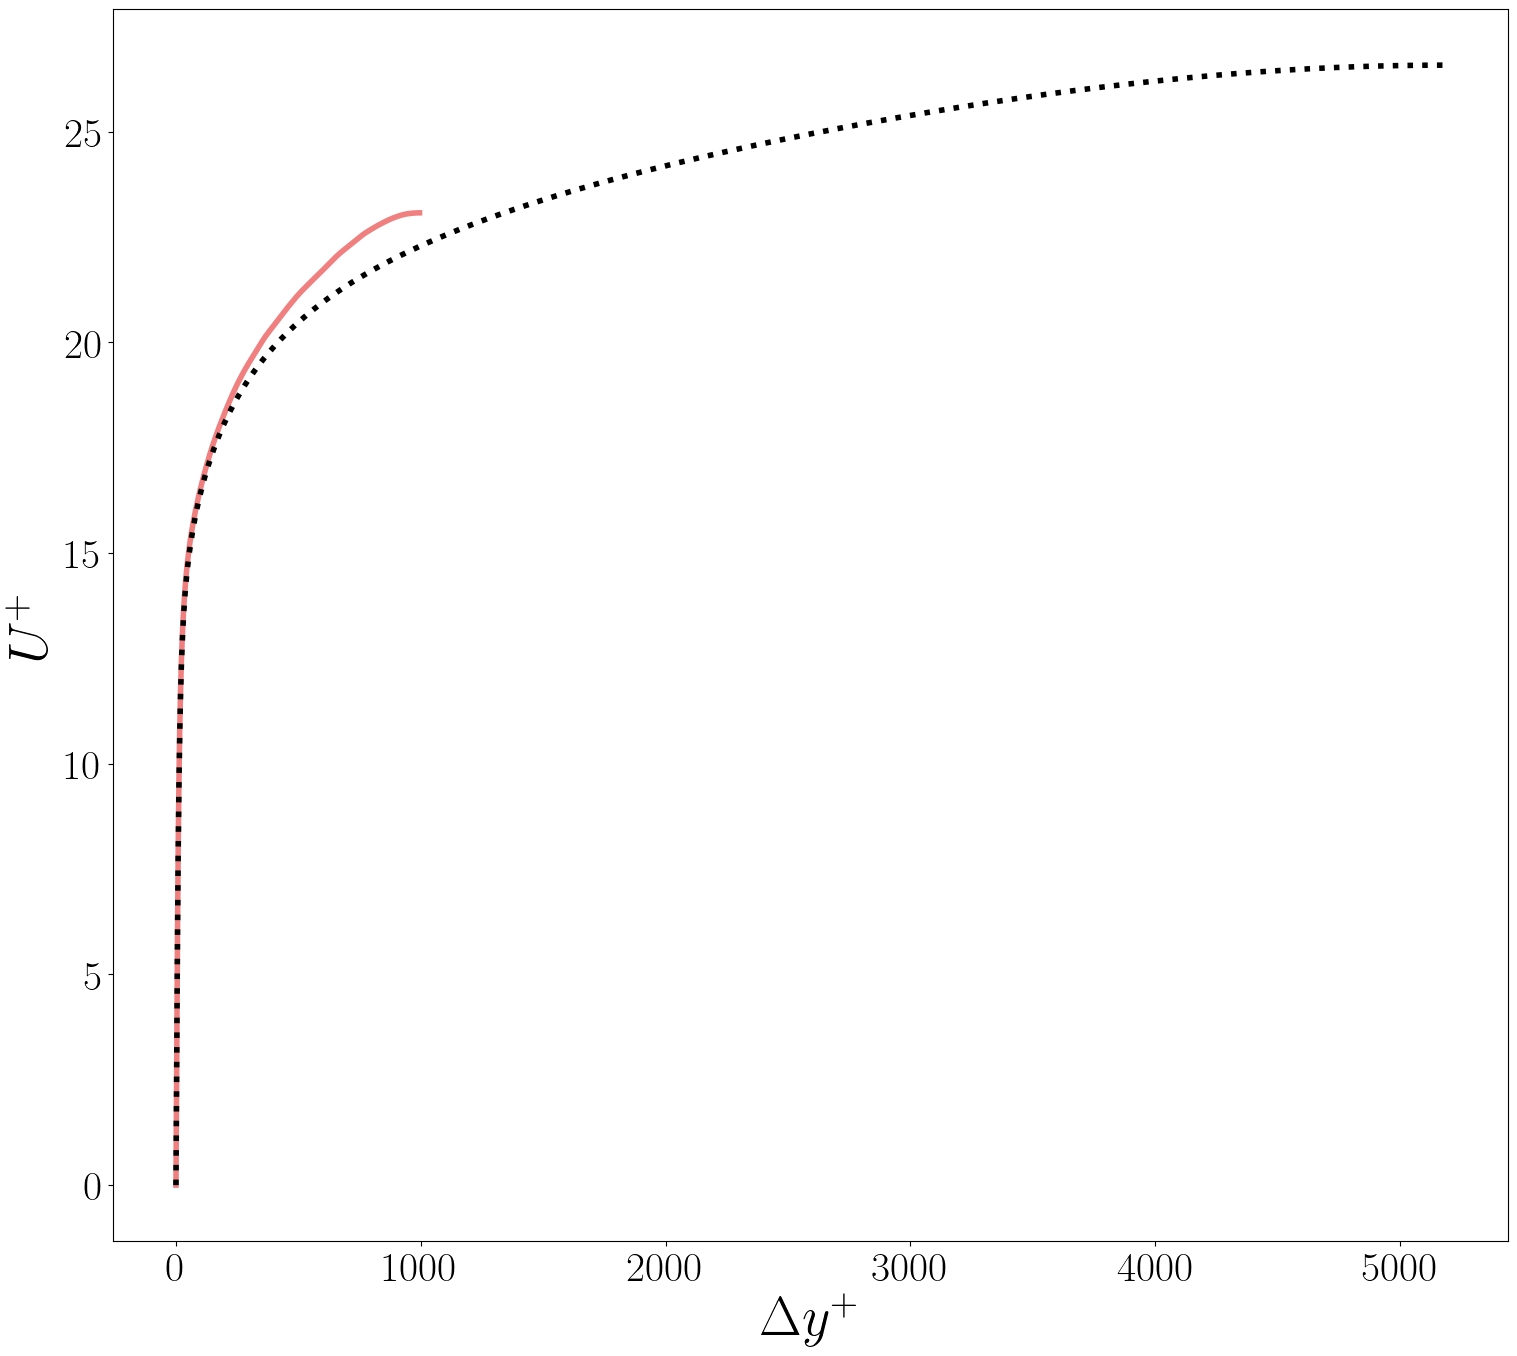

In [13]:
AxesLabel1, TickLabel1 = [40, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.plot(deltaYplus[0:256], u_mean/uTau, 'lightcoral', label=r'$u$', linewidth=4)
ax.plot(yPlus, U, 'k:', label=r'$u$', linewidth=4)

ax.set_xlabel(r'$\Delta y ^+$')
ax.set_ylabel(r'$U^+$')

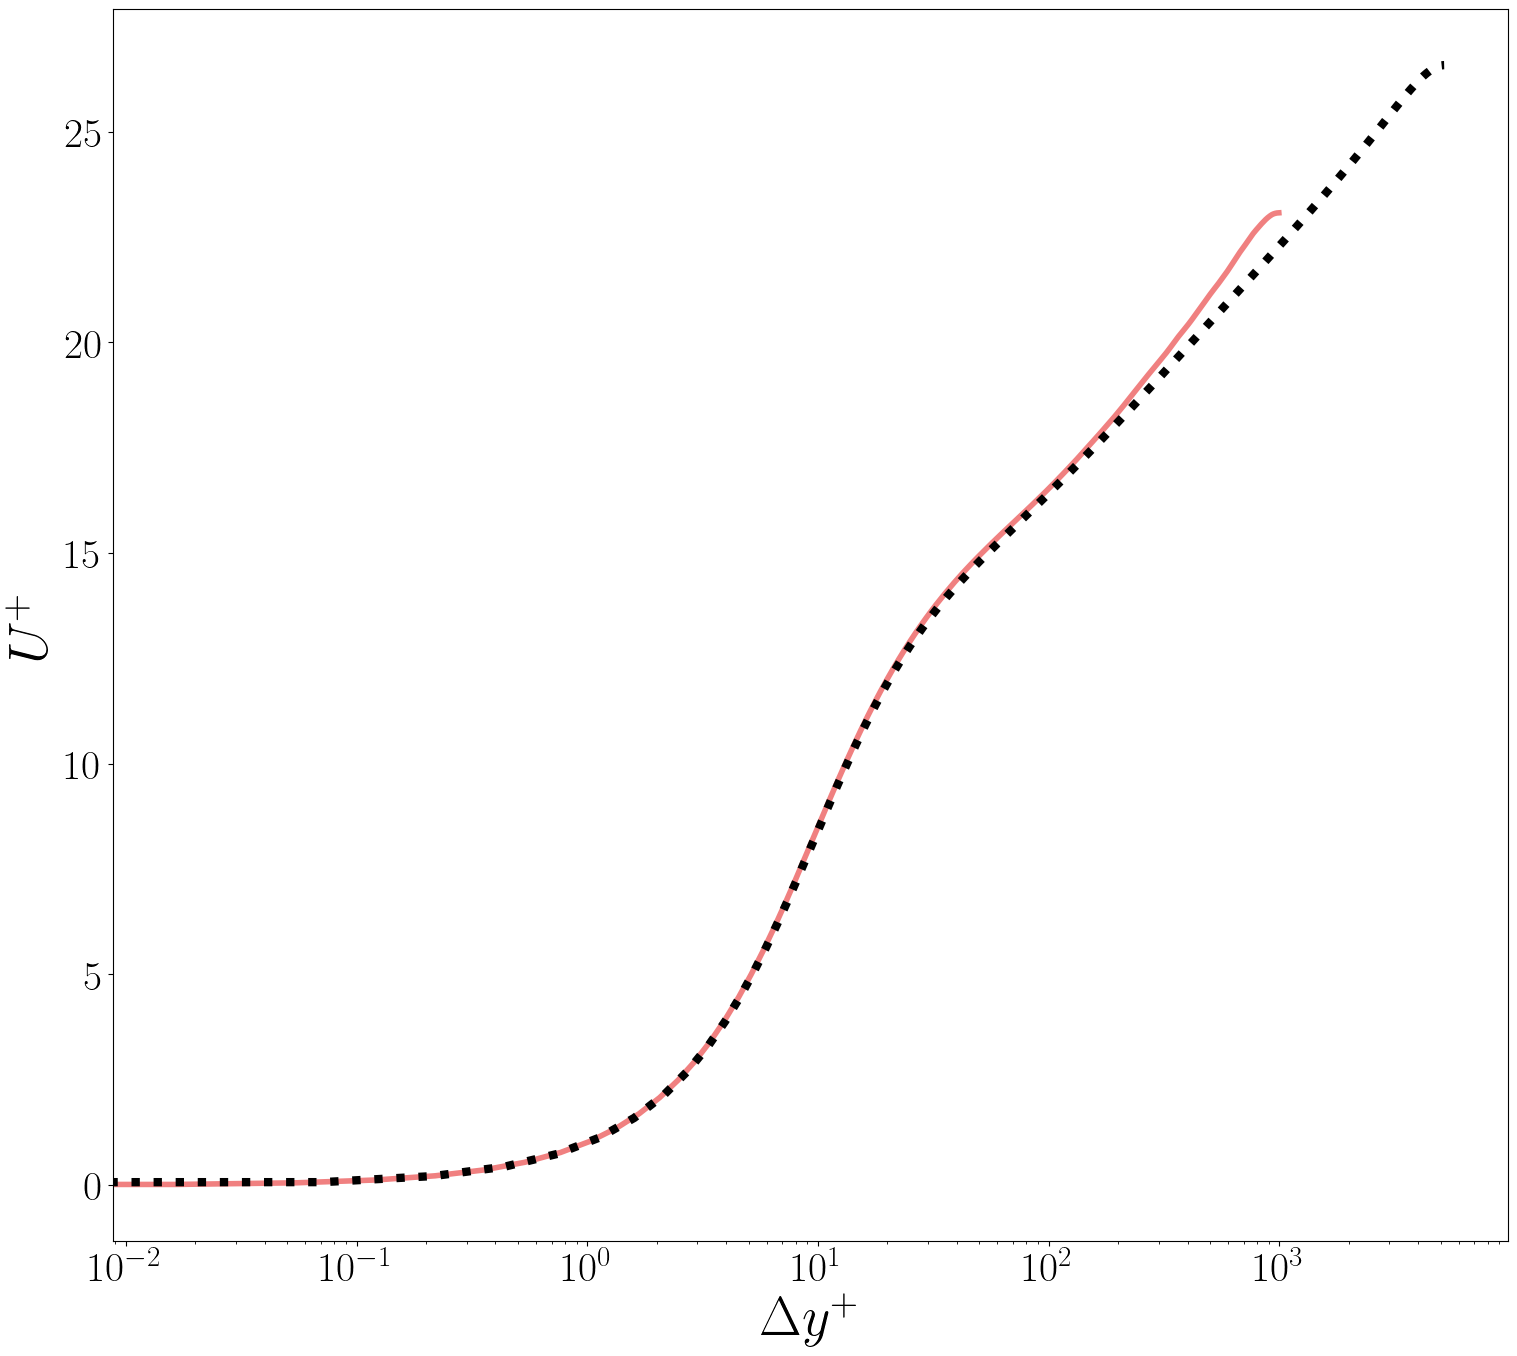

In [14]:
AxesLabel1, TickLabel1 = [40, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.semilogx(deltaYplus[0:256], u_mean/uTau, 'lightcoral', label=r'$u$', linewidth=4)
ax.semilogx(yPlus, U, 'k:', label=r'$u$', linewidth=6)

ax.set_xlabel(r'$\Delta y ^+$')
ax.set_ylabel(r'$U^+$')

plt.savefig('channelPlot/Lee_U.pdf', bbox_inches='tight')

### Computing and plotting velocity covariances

In [15]:
variance_ux = np.zeros(256)

for i in range(variance_ux.shape[0]):
    variance_ux[i] = np.var(np.array([ux[:,i,:].flatten(), ux[:,-i-1,:].flatten()]))

In [16]:
y2Temp = []
yPlus2Temp = []
uuTemp = []

with open('LeeVariance.dat') as f:
    for line in f:
        a,b,c,d,e,f,g,h,i = line.split()
        y2Temp.append(a)
        yPlus2Temp.append(b)
        uuTemp.append(c)
        
y2 = np.array(y2Temp, dtype='float32')
yPlus2 = np.array(yPlus2Temp, dtype='float32')
uu = np.array(uuTemp, dtype='float32')

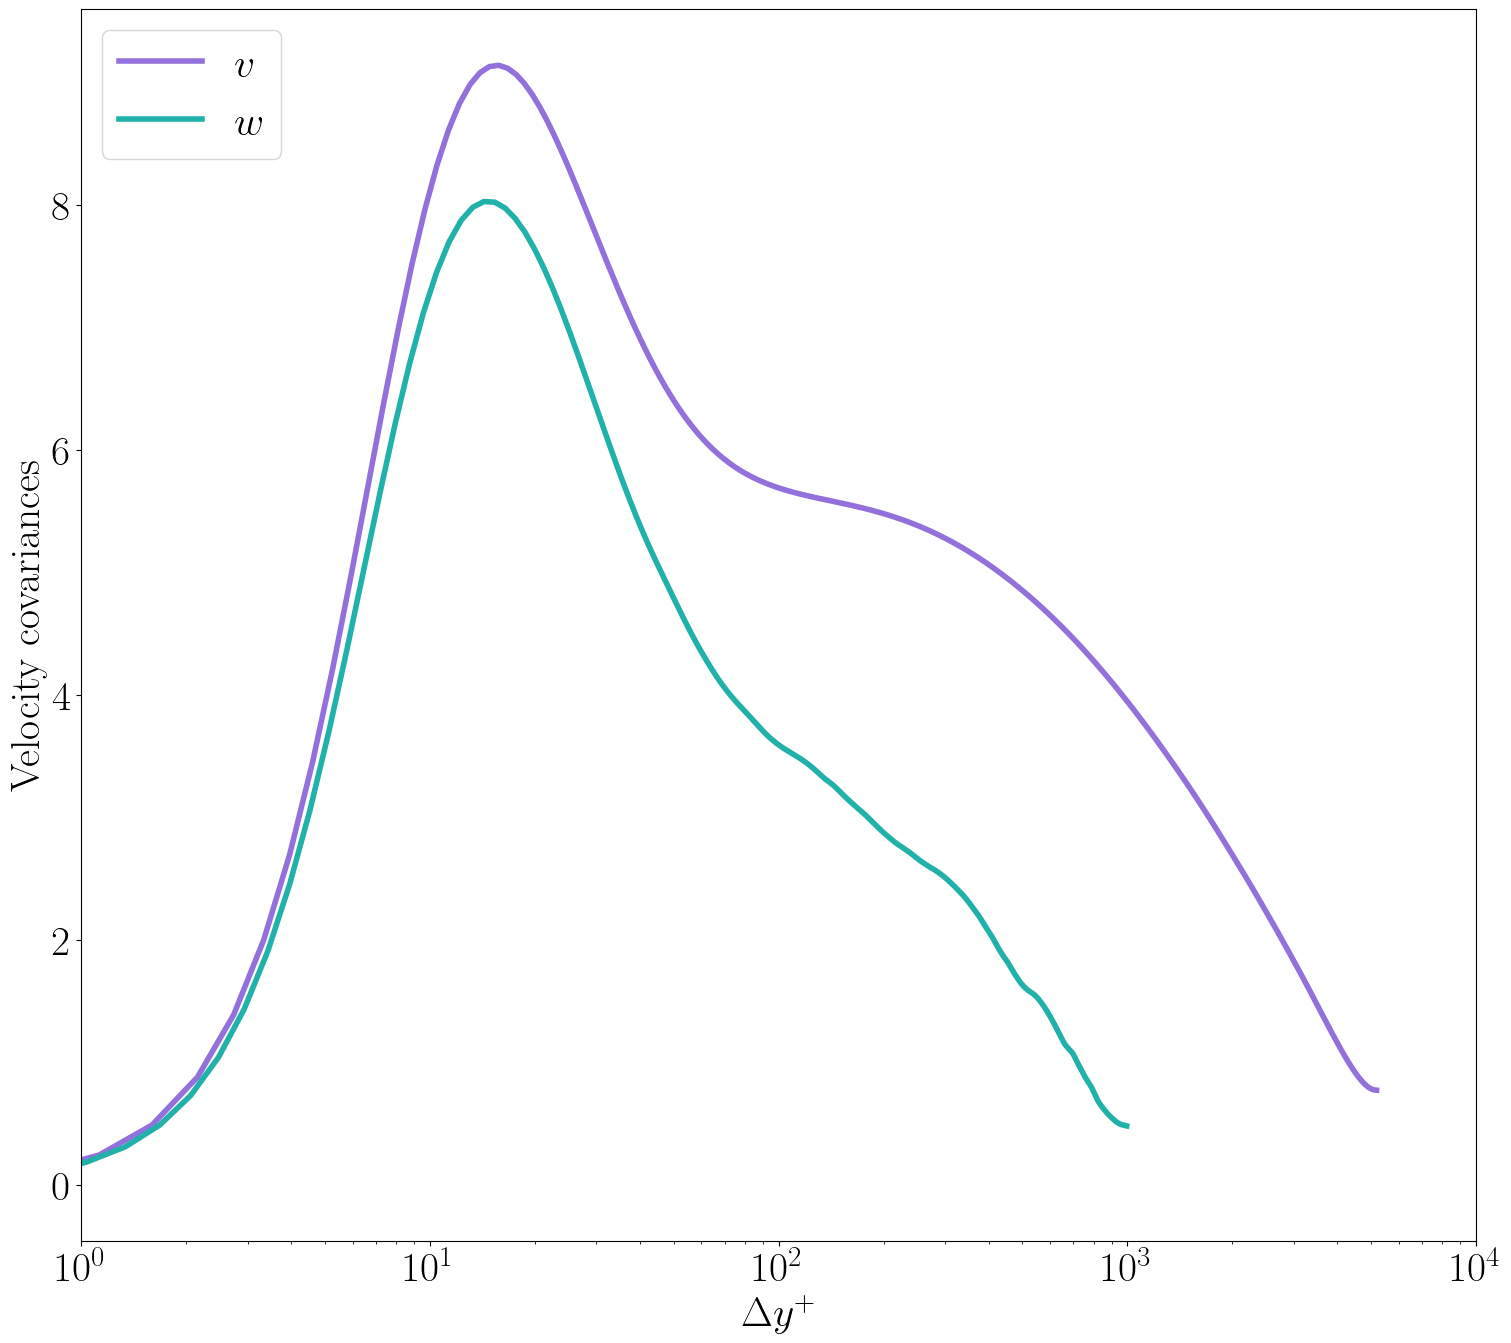

In [17]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.semilogx(yPlus2, uu, 'mediumpurple', label=r'$v$', linewidth=4)
ax.semilogx(deltaYplus[0:256], variance_ux/(uTau**2), 'lightseagreen', label=r'$w$', linewidth=4)

ax.set_xlim(1,10**4)
ax.set_xlabel(r'$\Delta y^+$')
ax.set_ylabel(r'Velocity covariances')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('channelPlot/variance_inner.pdf', bbox_inches='tight')

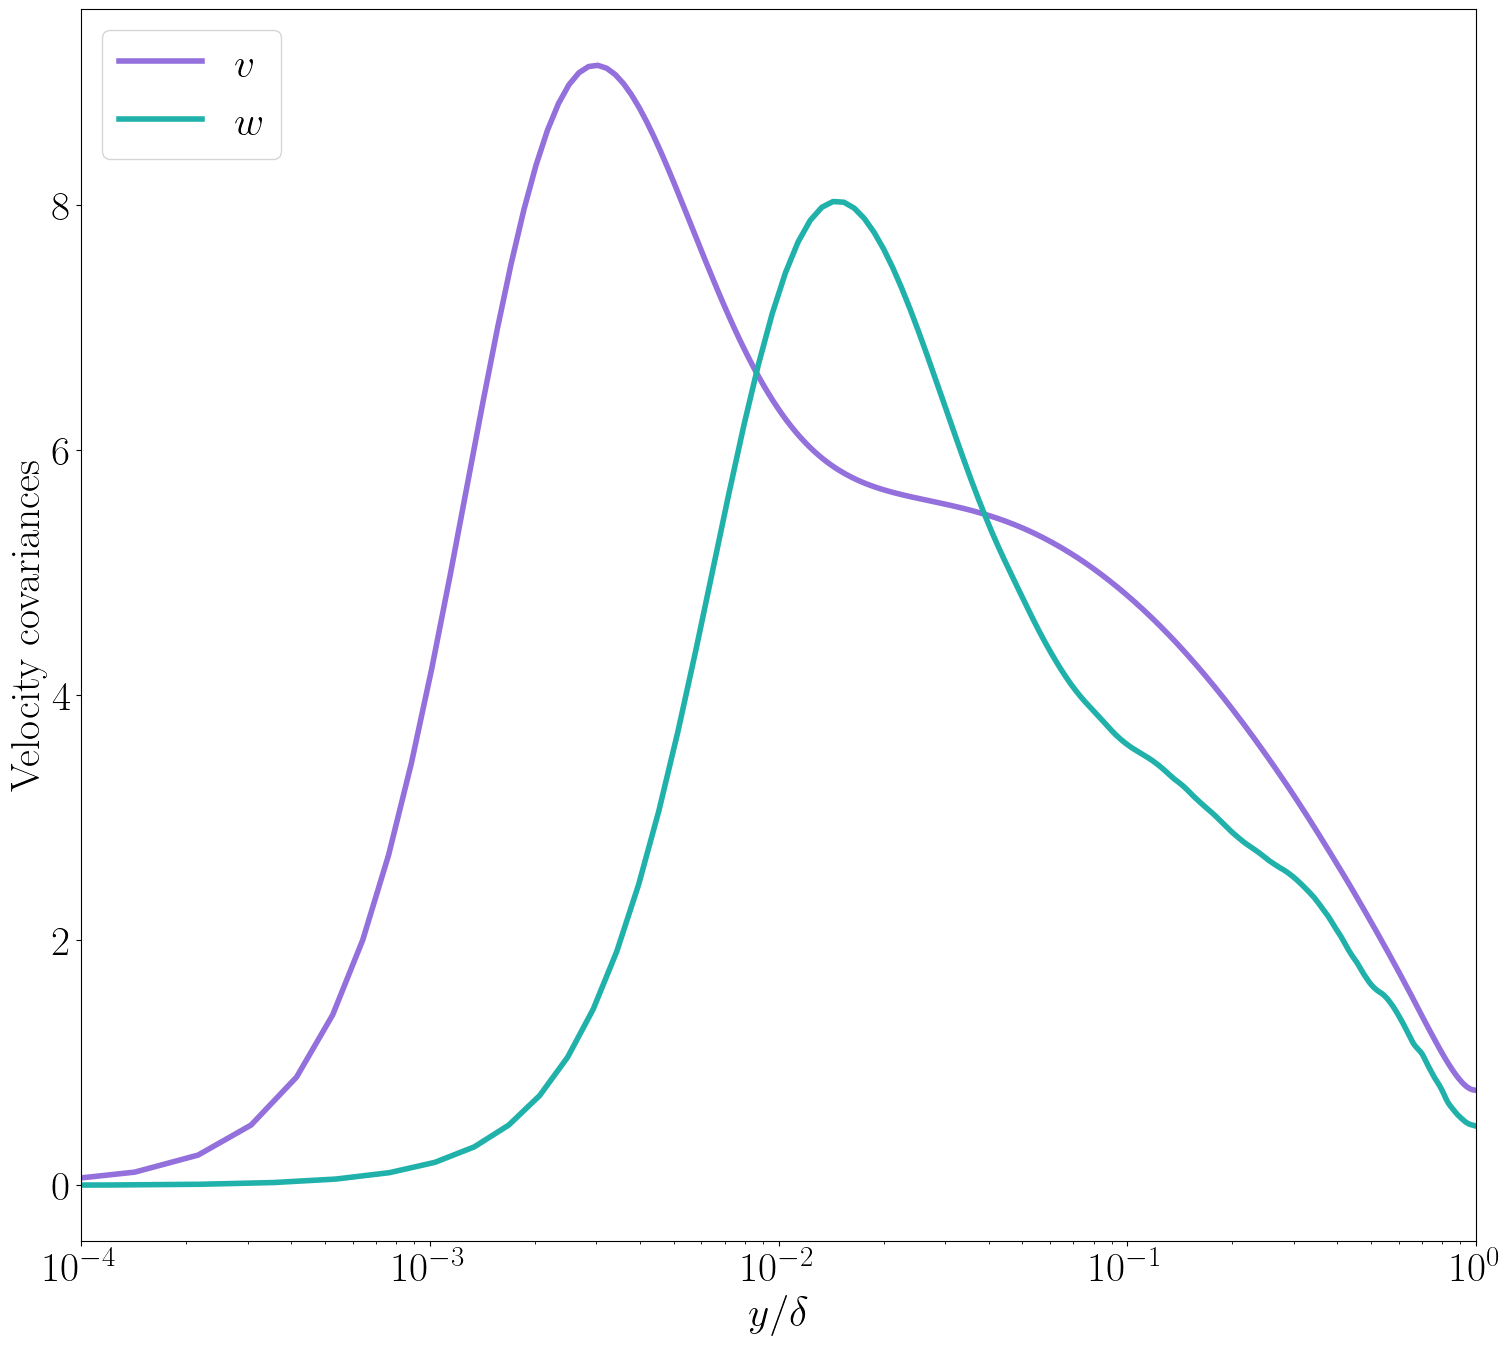

In [18]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.semilogx(yPlus/5200, uu, 'mediumpurple', label=r'$v$', linewidth=4)
ax.semilogx(y[0:256]-y[0], variance_ux/(uTau**2), 'lightseagreen', label=r'$w$', linewidth=4)

ax.set_xlim(10**-4,10**0)
ax.set_xlabel(r'$y/\delta $')
ax.set_ylabel('Velocity covariances')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('channelPlot/variance_outer.pdf', bbox_inches='tight')

### Energy Spectrum for $y^+ = 1000$

In [28]:
Nx = 384
Lx = 8 * np.pi
dx = Lx / (4 * Nx) 

ff = np.zeros([512,193])
fk = np.zeros([512,193])

for i in range(ux.shape[0]):
    f = ux[i,find_nearest(deltaYplus, value=1000),:]/uTau
    ff[i,:] = np.fft.rfft(f) / Nx;
    ff[i,:] = np.real(ff[i,:] * np.conj(ff[i,:]));
    fk[i,:] = 2 * np.pi * np.fft.rfftfreq(Nx, dx);
    
ff_mean = np.mean(ff,axis=0)
fk_mean = np.mean(fk,axis=0)

/var/folders/hf/0cn_0ff90hs01trnlkxzl3ch0000gn/T/ipykernel_95348/3774818206.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ff[i,:] = np.fft.rfft(f) / Nx;


In [29]:
kx1000Temp = []
E1000Temp = []

with open('spectra1000.dat') as f:
    for line in f:
        a,b,c,d,e = line.split()
        kx1000Temp.append(a)
        E1000Temp.append(b)
        
kx1000 = np.array(kx1000Temp, dtype='float32')
E1000 = np.array(E1000Temp, dtype='float32')

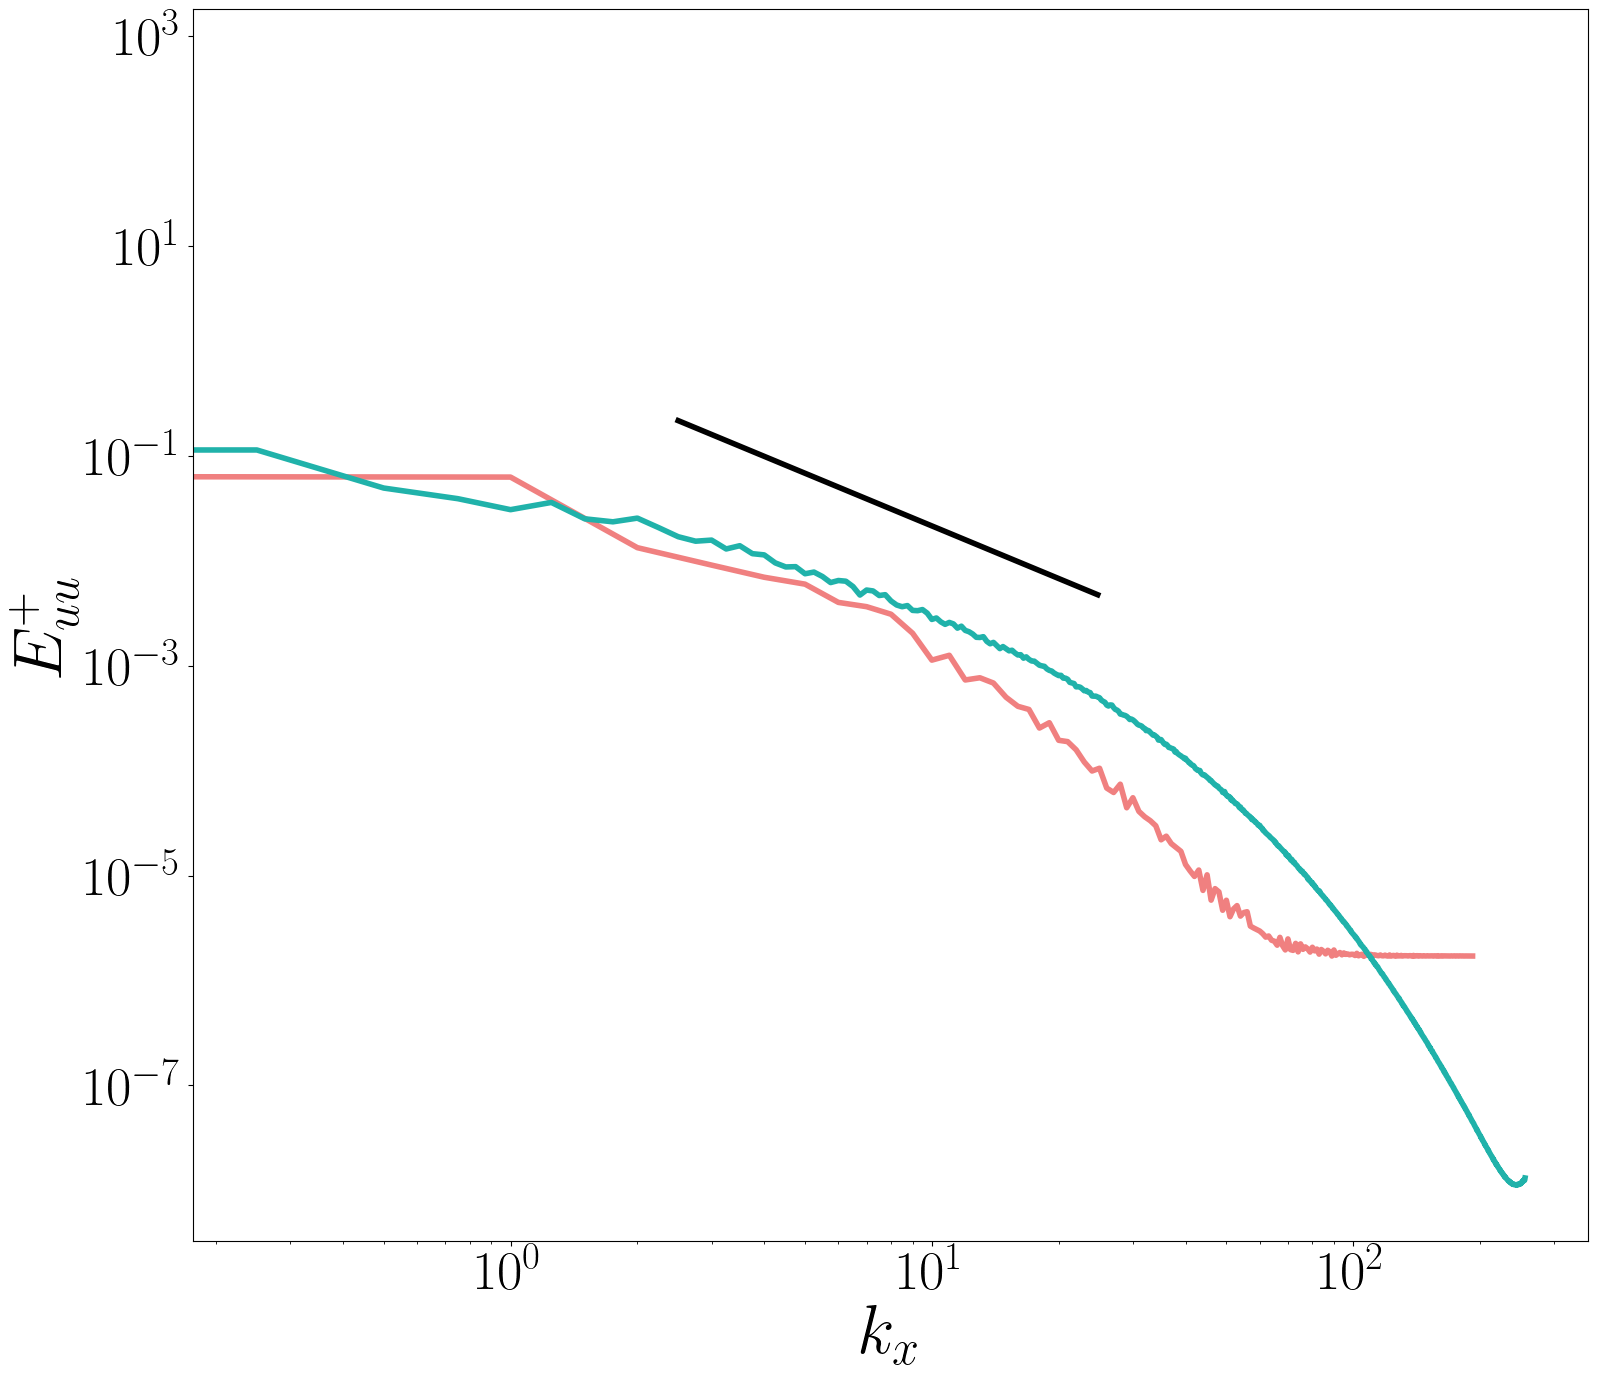

In [30]:
AxesLabel1, TickLabel1 = [50, 40]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(fk_mean, ff_mean, 'lightcoral', label=r'$w$', linewidth=4)
ax.loglog(kx1000, E1000, 'lightseagreen', label=r'$w$', linewidth=4)
ax.loglog(kx1000[10:100], kx1000[10:100]**(-5/3), 'k', label=r'$w$', linewidth=4)

ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$E_{uu}^+$')

plt.savefig('channelPlot/fig_2.5a.pdf', bbox_inches='tight')

### Energy Spectrum for $y^+ = 100$

In [31]:
Nx = 384
Lx = 8 * np.pi
dx = Lx / (4 * Nx) 

ff = np.zeros([512,193])
fk = np.zeros([512,193])

for i in range(ux.shape[0]):
    f = ux[i,find_nearest(deltaYplus, value=100),:]/uTau
    ff[i,:] = np.fft.rfft(f) / Nx;
    ff[i,:] = np.real(ff[i,:] * np.conj(ff[i,:]));
    fk[i,:] = 2 * np.pi * np.fft.rfftfreq(Nx, dx);
    
ff_mean = np.mean(ff,axis=0)
fk_mean = np.mean(fk,axis=0)

/var/folders/hf/0cn_0ff90hs01trnlkxzl3ch0000gn/T/ipykernel_95348/1370233137.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ff[i,:] = np.fft.rfft(f) / Nx;


In [32]:
kx100Temp = []
E100Temp = []

with open('spectra100.dat') as f:
    for line in f:
        a,b,c,d,e = line.split()
        kx100Temp.append(a)
        E100Temp.append(b)
        
kx100 = np.array(kx100Temp, dtype='float32')
E100 = np.array(E100Temp, dtype='float32')

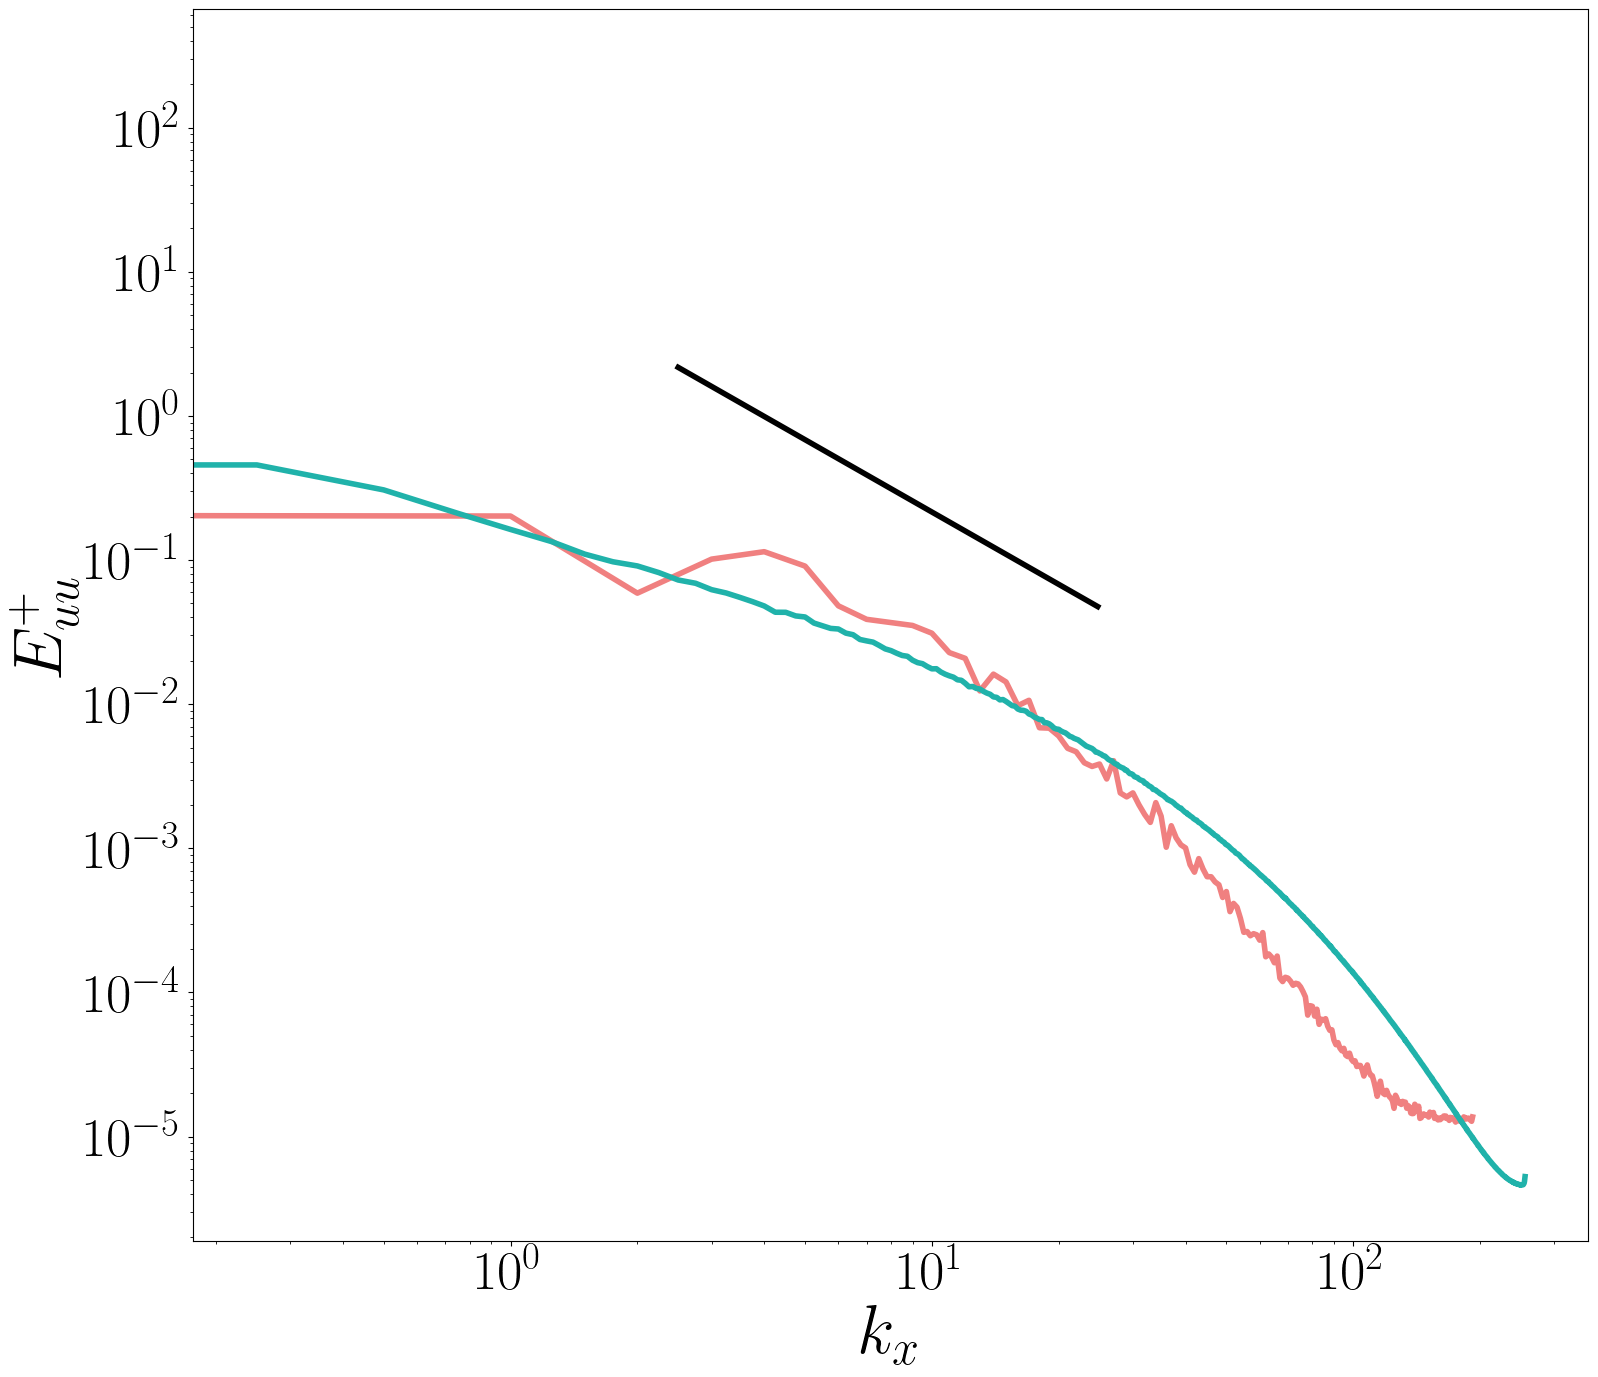

In [33]:
AxesLabel1, TickLabel1 = [50, 40]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(fk_mean, ff_mean, 'lightcoral', label=r'$w$', linewidth=4)
ax.loglog(kx100, E100, 'lightseagreen', label=r'$w$', linewidth=4)
ax.loglog(kx1000[10:100], 10*kx1000[10:100]**(-5/3), 'k', label=r'$w$', linewidth=4)

ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$E_{uu}^+$')

plt.savefig('channelPlot/fig_2.5b.pdf', bbox_inches='tight')

### Energy Spectrum for $y^+ = 0.5$

In [34]:
Nx = 384
Lx = 8 * np.pi
dx = Lx / (4 * Nx) 

ff = np.zeros([512,193])
fk = np.zeros([512,193])

for i in range(ux.shape[0]):
    f = ux[i,find_nearest(deltaYplus, value=0.5),:]/uTau
    ff[i,:] = np.fft.rfft(f) / Nx;
    ff[i,:] = np.real(ff[i,:] * np.conj(ff[i,:]));
    fk[i,:] = 2 * np.pi * np.fft.rfftfreq(Nx, dx);
    
ff_mean = np.mean(ff,axis=0)
fk_mean = np.mean(fk,axis=0)

/var/folders/hf/0cn_0ff90hs01trnlkxzl3ch0000gn/T/ipykernel_95348/2675300022.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ff[i,:] = np.fft.rfft(f) / Nx;


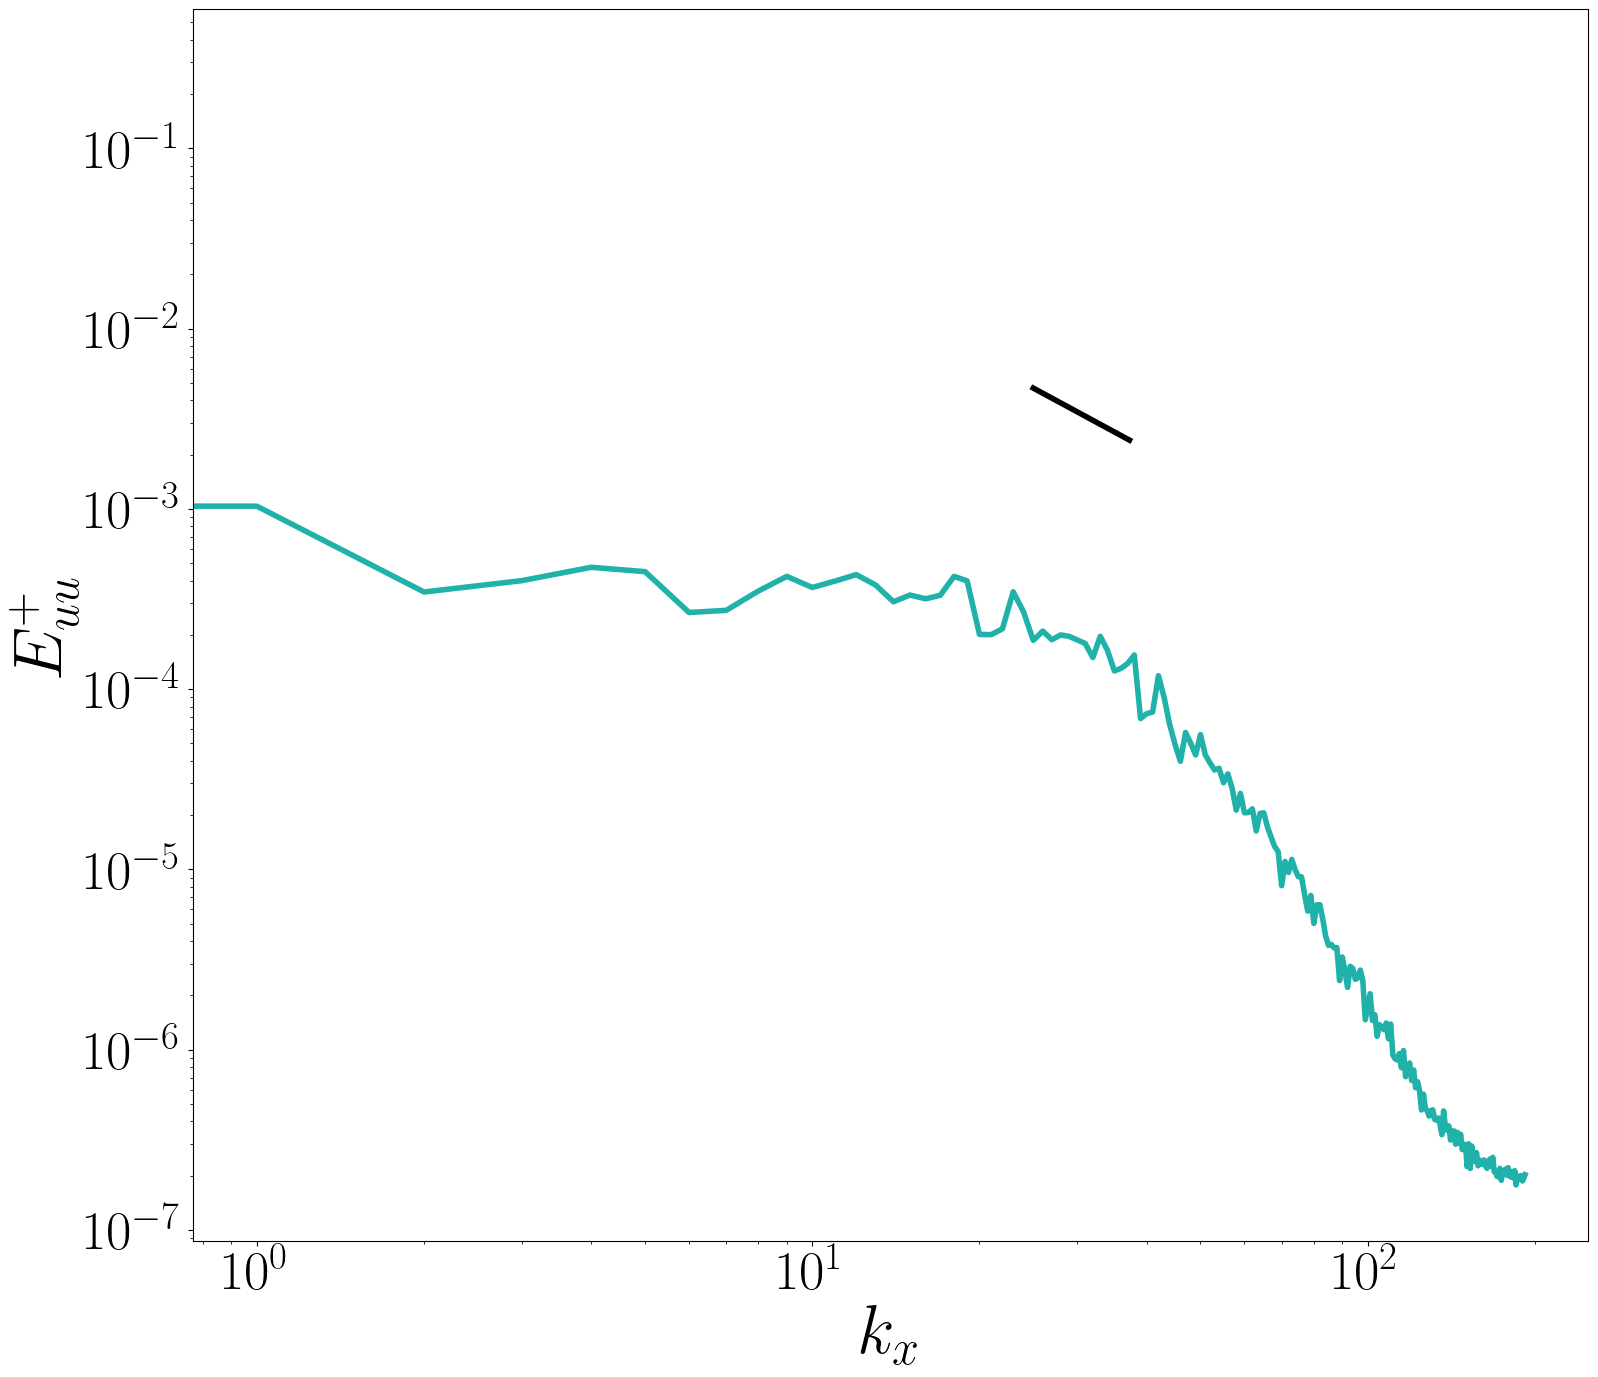

In [35]:
AxesLabel1, TickLabel1 = [50, 40]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(fk_mean, ff_mean, 'lightseagreen', label=r'$w$', linewidth=4)
ax.loglog(kx1000[100:150], kx1000[100:150]**(-5/3), 'k', label=r'$w$', linewidth=4)

ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$E_{uu}^+$')

plt.savefig('channelPlot/fig_2.5c.pdf', bbox_inches='tight')